# ART HopSkipJump Attack

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import sys
!{sys.executable} -m pip install git+https://github.com/nottombrown/imagenet_stubs
sys.path.append("..")

%matplotlib inline

import json

import imagenet_stubs
import numpy as np
import torch
import pretrainedmodels as pm
from matplotlib import pyplot as plt
from IPython.display import clear_output
from PIL import Image
import pretrainedmodels.utils as utils

from art.estimators.classification import PyTorchClassifier
from art.attacks.evasion import HopSkipJump
from art.utils import to_categorical

  Cloning https://github.com/nottombrown/imagenet_stubs to /tmp/pip-req-build-enbwuklu
  Running command git clone -q https://github.com/nottombrown/imagenet_stubs /tmp/pip-req-build-enbwuklu
  Created wheel for imagenet-stubs: filename=imagenet_stubs-0.0.7-py3-none-any.whl size=794838 sha256=c2ffb19cefe5ab48c0b9b466b7b60a8ccc1c0599cc973dfae6a150e6e7bc3960
  Stored in directory: /tmp/pip-ephem-wheel-cache-c12xaimi/wheels/64/e6/a3/53e4a13354406428112f1ae250f746f879b8e9ab55397fa2d1
Successfully built imagenet-stubs


# Model Definition

In [2]:
# load classes
cls = {int(k):v for k,v in json.load(open('../imagenet_classes.json')).items()}

In [4]:
dim = 331
mean_imagenet = np.zeros([3,dim, dim])
mean_imagenet[0,...].fill(103.939)
mean_imagenet[1,...].fill(116.779)
mean_imagenet[2,...].fill(123.68)
model = pm.pnasnet5large(num_classes=1000, pretrained='imagenet')
model.to('cuda')
classifier = PyTorchClassifier(clip_values=(0, 255), 
                               input_shape=(3,dim,dim),
                               nb_classes=1000,
                               model=model, 
                               preprocessing=(mean_imagenet, 128.), 
                               loss=None)

# Get Target and Init Images

In [5]:
def image_load(image_path, target_size):
    return np.asarray(Image.open(image_path).resize(target_size)).astype(np.float32)

In [25]:
def softmax(x):
    return np.exp(x)/sum(np.exp(x))

Target image is:  koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus 105 0.87594324


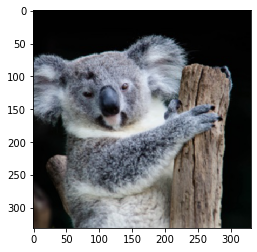

Init image is:  thresher, thrasher, threshing machine 856 0.54920864


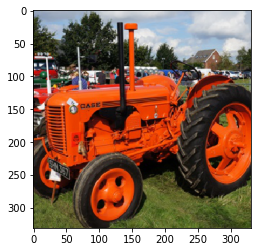

In [30]:
target_image_name = 'koala.jpg'
init_image_name = 'tractor.jpg'
target_image_path = ''
init_image_path = ''
for image_path in imagenet_stubs.get_image_paths():
    if image_path.endswith(target_image_name):
        target_image_path = image_path
        target_image = image_load(target_image_path, target_size=(dim, dim))
    if image_path.endswith(init_image_name):
        init_image_path = image_path
        init_image = image_load(init_image_path, target_size=(dim, dim))

target_pred = classifier.predict(target_image.transpose(2,0,1)[np.newaxis])
target_idx = np.argmax(target_pred[0])
print("Target image is: ", cls[target_idx], target_idx, np.max(softmax(target_pred[0])))
plt.imshow(target_image.astype(np.uint))
plt.show()
init_pred = classifier.predict(init_image.transpose(2,0,1)[np.newaxis])
init_idx = np.argmax(init_pred[0])
print("Init image is: ", cls[init_idx], init_idx, np.max(softmax(init_pred[0])))
plt.imshow(init_image.astype(np.uint))
plt.show()

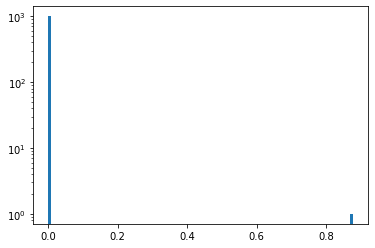

In [35]:
plt.hist(softmax(target_pred[0]), bins=100, log=True);

# HopSkipJump Untargeted Attack

HopSkipJump: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]


Adversarial image at step 0. L2 error 37145.855 and class label cougar, puma, catamount, mountain lion, painter, panther, Felis concolor.


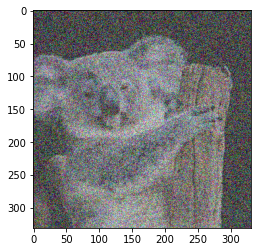

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 3, 331, 331) (1, 3, 331, 331)


HopSkipJump: 100%|██████████| 1/1 [00:12<00:00, 12.43s/it]

Adversarial image at step 10. L2 error 29559.365 and class label Arabian camel, dromedary, Camelus dromedarius.


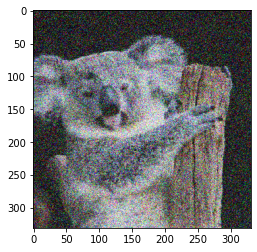

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 3, 331, 331) (1, 3, 331, 331)


HopSkipJump: 100%|██████████| 1/1 [00:18<00:00, 18.26s/it]

Adversarial image at step 20. L2 error 21505.04 and class label Arabian camel, dromedary, Camelus dromedarius.


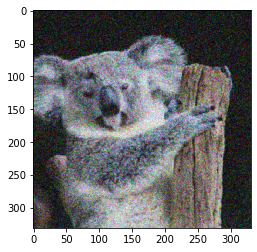

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 3, 331, 331) (1, 3, 331, 331)


HopSkipJump: 100%|██████████| 1/1 [00:22<00:00, 22.08s/it]

Adversarial image at step 30. L2 error 16934.145 and class label Arabian camel, dromedary, Camelus dromedarius.


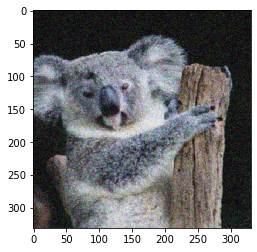

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 3, 331, 331) (1, 3, 331, 331)


HopSkipJump: 100%|██████████| 1/1 [00:25<00:00, 25.54s/it]

Adversarial image at step 40. L2 error 13671.964 and class label Arabian camel, dromedary, Camelus dromedarius.


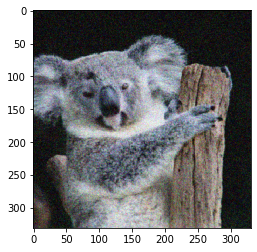

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 3, 331, 331) (1, 3, 331, 331)


HopSkipJump: 100%|██████████| 1/1 [00:28<00:00, 28.44s/it]

Adversarial image at step 50. L2 error 11366.023 and class label Arabian camel, dromedary, Camelus dromedarius.


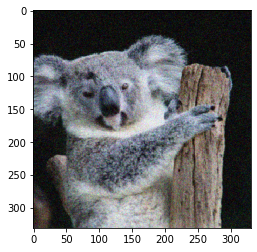

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 3, 331, 331) (1, 3, 331, 331)


HopSkipJump: 100%|██████████| 1/1 [00:30<00:00, 30.90s/it]

Adversarial image at step 60. L2 error 9324.947 and class label Arabian camel, dromedary, Camelus dromedarius.


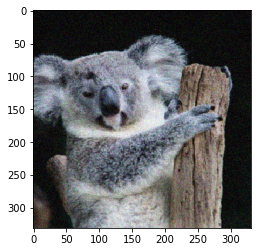

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 3, 331, 331) (1, 3, 331, 331)


HopSkipJump: 100%|██████████| 1/1 [00:33<00:00, 33.20s/it]

Adversarial image at step 70. L2 error 7872.531 and class label Arabian camel, dromedary, Camelus dromedarius.


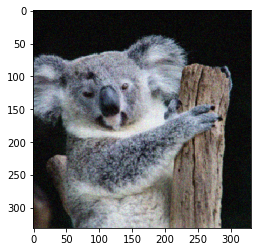

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 3, 331, 331) (1, 3, 331, 331)


HopSkipJump: 100%|██████████| 1/1 [00:35<00:00, 35.31s/it]

Adversarial image at step 80. L2 error 6771.767 and class label Arabian camel, dromedary, Camelus dromedarius.


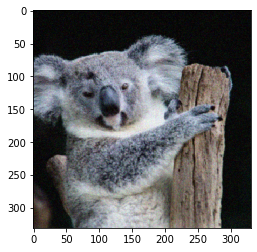

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 3, 331, 331) (1, 3, 331, 331)


HopSkipJump: 100%|██████████| 1/1 [00:37<00:00, 37.30s/it]

Adversarial image at step 90. L2 error 5848.7207 and class label Arabian camel, dromedary, Camelus dromedarius.


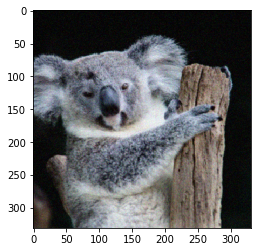

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 3, 331, 331) (1, 3, 331, 331)


HopSkipJump: 100%|██████████| 1/1 [00:39<00:00, 39.08s/it]

Adversarial image at step 100. L2 error 5166.936 and class label Arabian camel, dromedary, Camelus dromedarius.


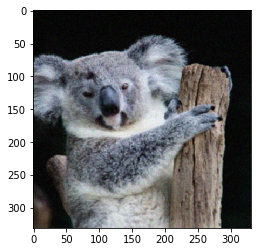

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 3, 331, 331) (1, 3, 331, 331)


HopSkipJump: 100%|██████████| 1/1 [00:40<00:00, 40.82s/it]

Adversarial image at step 110. L2 error 4589.487 and class label Arabian camel, dromedary, Camelus dromedarius.


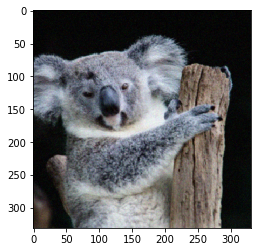

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 3, 331, 331) (1, 3, 331, 331)


HopSkipJump: 100%|██████████| 1/1 [00:42<00:00, 42.60s/it]

Adversarial image at step 120. L2 error 4097.7036 and class label Arabian camel, dromedary, Camelus dromedarius.


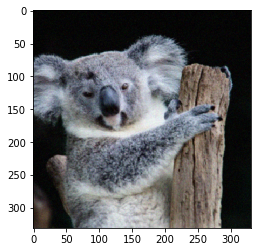

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 3, 331, 331) (1, 3, 331, 331)


HopSkipJump: 100%|██████████| 1/1 [00:44<00:00, 44.21s/it]

Adversarial image at step 130. L2 error 3710.6753 and class label Arabian camel, dromedary, Camelus dromedarius.


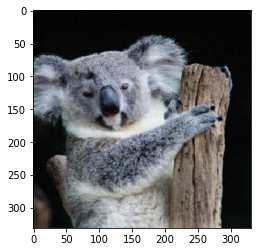

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 3, 331, 331) (1, 3, 331, 331)


HopSkipJump: 100%|██████████| 1/1 [00:45<00:00, 45.72s/it]

Adversarial image at step 140. L2 error 3374.8862 and class label Arabian camel, dromedary, Camelus dromedarius.


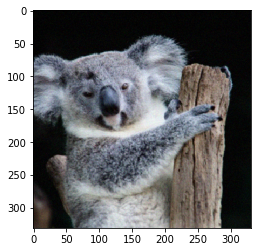

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 3, 331, 331) (1, 3, 331, 331)


HopSkipJump: 100%|██████████| 1/1 [00:47<00:00, 47.26s/it]

Adversarial image at step 150. L2 error 3107.1895 and class label Arabian camel, dromedary, Camelus dromedarius.


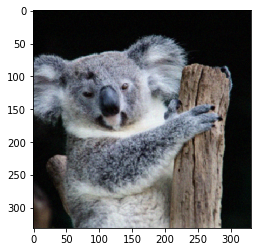

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 3, 331, 331) (1, 3, 331, 331)


HopSkipJump: 100%|██████████| 1/1 [00:48<00:00, 48.65s/it]

Adversarial image at step 160. L2 error 2884.7075 and class label Arabian camel, dromedary, Camelus dromedarius.


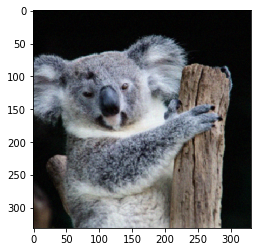

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 3, 331, 331) (1, 3, 331, 331)


HopSkipJump: 100%|██████████| 1/1 [00:50<00:00, 50.10s/it]

Adversarial image at step 170. L2 error 2684.8877 and class label Arabian camel, dromedary, Camelus dromedarius.


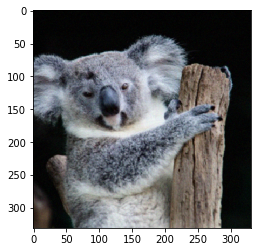

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 3, 331, 331) (1, 3, 331, 331)


HopSkipJump: 100%|██████████| 1/1 [00:51<00:00, 51.39s/it]


Adversarial image at step 180. L2 error 2500.599 and class label Arabian camel, dromedary, Camelus dromedarius.


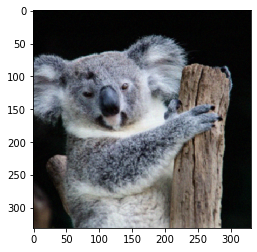

(1, 3, 331, 331) (1, 3, 331, 331)


HopSkipJump: 100%|██████████| 1/1 [00:52<00:00, 52.66s/it]

Adversarial image at step 190. L2 error 2349.6924 and class label Arabian camel, dromedary, Camelus dromedarius.


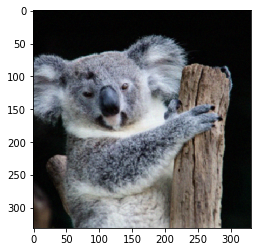

(1, 3, 331, 331) (1, 3, 331, 331)


In [36]:
attack = HopSkipJump(classifier=classifier, targeted=False, max_iter=0, max_eval=1000, init_eval=10)
iter_step = 10
x_adv_u = None
target_image_input = target_image.transpose(2,0,1)[np.newaxis]
for i in range(20):
    x_adv_u = attack.generate(x=target_image_input, x_adv_init=x_adv_u, resume=True)

    #clear_output()
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv_u[0] - target_image_input, [-1])),
          "and class label %s." % cls[np.argmax(classifier.predict(x_adv_u)[0])])
    plt.imshow(x_adv_u[0].transpose(1,2,0).astype(np.uint))
    plt.show(block=False)
    
    print(x_adv_u.shape, target_image_input.shape)
    attack.max_iter = iter_step

tench, Tinca tinca 0.46084723 0.19466111


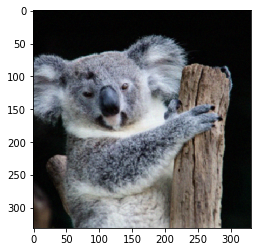

In [41]:
pred_u = classifier.predict(x_adv_u[0][np.newaxis])
print(cls[np.argmax(pred[0])], np.max(softmax(pred_u[0])), softmax(pred_u[0])[105])
plt.imshow(x_adv_u[0].transpose(1,2,0).astype(np.uint));

# HopSkipJump Targeted Attack

HopSkipJump: 100%|██████████| 1/1 [00:00<00:00, 2250.16it/s]

Adversarial image at step 0. L2 error 65565.99 and class label thresher, thrasher, threshing machine. with a score of 0.549209


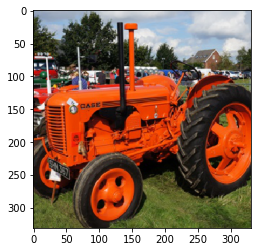

HopSkipJump: 100%|██████████| 1/1 [00:16<00:00, 16.52s/it]

Adversarial image at step 10. L2 error 49392.812 and class label thresher, thrasher, threshing machine. with a score of 0.361967


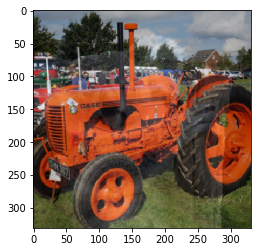

HopSkipJump: 100%|██████████| 1/1 [00:20<00:00, 20.54s/it]

Adversarial image at step 20. L2 error 48590.664 and class label thresher, thrasher, threshing machine. with a score of 0.366344


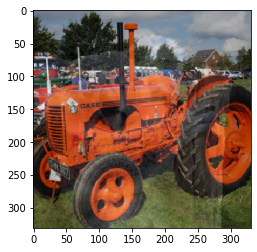

HopSkipJump: 100%|██████████| 1/1 [00:23<00:00, 23.44s/it]

Adversarial image at step 30. L2 error 44718.56 and class label thresher, thrasher, threshing machine. with a score of 0.412800


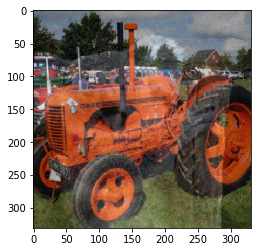

HopSkipJump: 100%|██████████| 1/1 [00:25<00:00, 25.65s/it]

Adversarial image at step 40. L2 error 23936.354 and class label thresher, thrasher, threshing machine. with a score of 0.406478


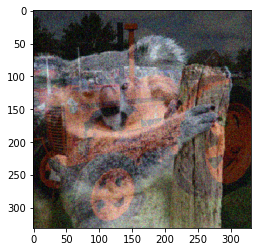

HopSkipJump: 100%|██████████| 1/1 [00:28<00:00, 28.33s/it]

Adversarial image at step 50. L2 error 21355.639 and class label thresher, thrasher, threshing machine. with a score of 0.195777


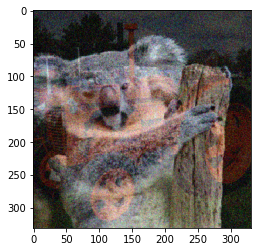

HopSkipJump: 100%|██████████| 1/1 [00:30<00:00, 30.96s/it]

Adversarial image at step 60. L2 error 19120.027 and class label thresher, thrasher, threshing machine. with a score of 0.110375


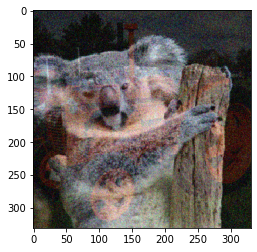

HopSkipJump: 100%|██████████| 1/1 [00:33<00:00, 33.31s/it]

Adversarial image at step 70. L2 error 17834.393 and class label thresher, thrasher, threshing machine. with a score of 0.095579


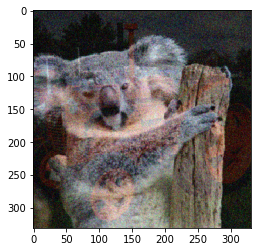

HopSkipJump: 100%|██████████| 1/1 [00:35<00:00, 35.18s/it]

Adversarial image at step 80. L2 error 16244.86 and class label thresher, thrasher, threshing machine. with a score of 0.053501


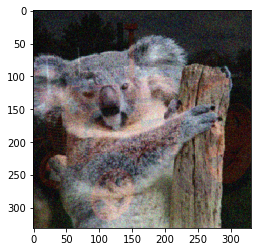

HopSkipJump: 100%|██████████| 1/1 [00:37<00:00, 37.26s/it]

Adversarial image at step 90. L2 error 15016.915 and class label thresher, thrasher, threshing machine. with a score of 0.100120


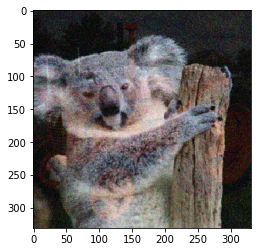

HopSkipJump: 100%|██████████| 1/1 [00:38<00:00, 38.80s/it]

Adversarial image at step 100. L2 error 13932.712 and class label thresher, thrasher, threshing machine. with a score of 0.065612


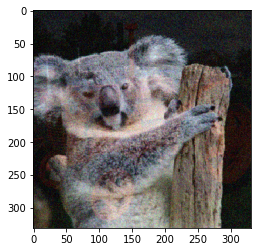

HopSkipJump: 100%|██████████| 1/1 [00:40<00:00, 40.56s/it]

Adversarial image at step 110. L2 error 12428.971 and class label thresher, thrasher, threshing machine. with a score of 0.059635


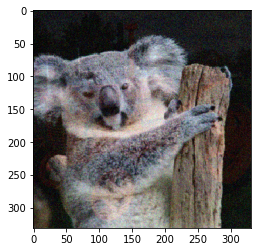

HopSkipJump: 100%|██████████| 1/1 [00:42<00:00, 42.34s/it]

Adversarial image at step 120. L2 error 11740.14 and class label thresher, thrasher, threshing machine. with a score of 0.045092


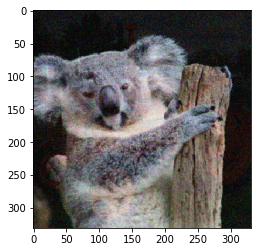

HopSkipJump: 100%|██████████| 1/1 [00:44<00:00, 44.22s/it]

Adversarial image at step 130. L2 error 10520.041 and class label thresher, thrasher, threshing machine. with a score of 0.061709


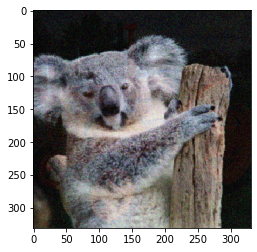

HopSkipJump: 100%|██████████| 1/1 [00:45<00:00, 45.69s/it]

Adversarial image at step 140. L2 error 9648.162 and class label thresher, thrasher, threshing machine. with a score of 0.099679


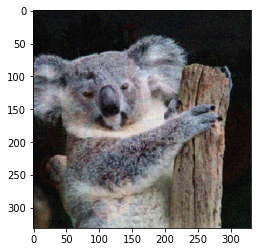

HopSkipJump: 100%|██████████| 1/1 [00:47<00:00, 47.25s/it]

Adversarial image at step 150. L2 error 8748.042 and class label thresher, thrasher, threshing machine. with a score of 0.062107


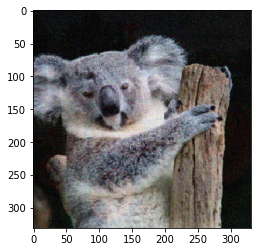

HopSkipJump: 100%|██████████| 1/1 [00:48<00:00, 48.73s/it]

Adversarial image at step 160. L2 error 8018.966 and class label thresher, thrasher, threshing machine. with a score of 0.074785


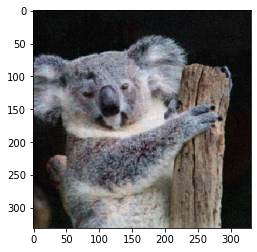

HopSkipJump: 100%|██████████| 1/1 [00:50<00:00, 50.24s/it]

Adversarial image at step 170. L2 error 7444.467 and class label thresher, thrasher, threshing machine. with a score of 0.078193


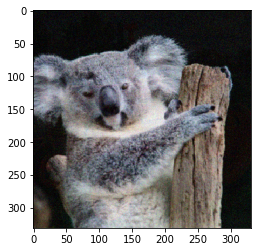

HopSkipJump: 100%|██████████| 1/1 [00:51<00:00, 51.55s/it]

Adversarial image at step 180. L2 error 6934.0312 and class label thresher, thrasher, threshing machine. with a score of 0.079220


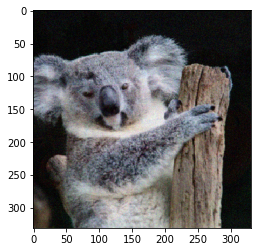

HopSkipJump: 100%|██████████| 1/1 [00:52<00:00, 52.81s/it]

Adversarial image at step 190. L2 error 6512.0977 and class label thresher, thrasher, threshing machine. with a score of 0.078144


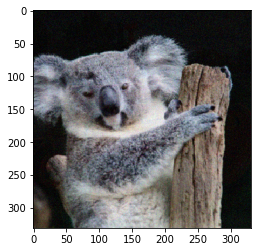

In [40]:
attack = HopSkipJump(classifier=classifier, targeted=True, max_iter=0, max_eval=1000, init_eval=10)
iter_step = 10
x_adv = init_image.transpose(2,0,1)[np.newaxis]
target_image_input = target_image.transpose(2,0,1)[np.newaxis]
for i in range(20):
    x_adv = attack.generate(x=target_image_input, y=to_categorical([856], 1000), x_adv_init=x_adv, resume=True)

    #clear_output()
    pred = classifier.predict(x_adv)[0]
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image_input, [-1])),
          "and class label %s." % cls[np.argmax(pred)],
          "with a score of %f" % np.max(softmax(pred)))
    plt.imshow(x_adv[0].transpose(1,2,0).astype(np.uint))
    plt.show(block=False)
    
    attack.max_iter = iter_step

thresher, thrasher, threshing machine 0.06455963


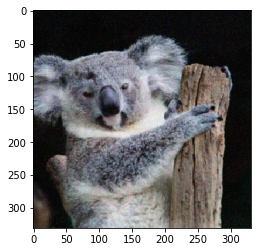

In [28]:
pred = classifier.predict(x_adv[0][np.newaxis])
print(cls[np.argmax(pred[0])], np.max(softmax(pred[0])))
plt.imshow(x_adv[0].transpose(1,2,0).astype(np.uint));

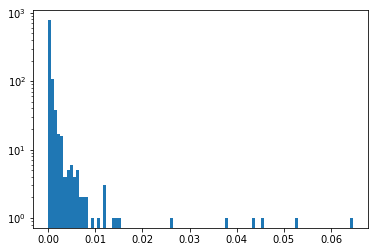

In [34]:
plt.hist(softmax(pred[0]), bins=100, log=True);

# Unsquared Images

HopSkipJump attack supports inputs of unsquared images. The code in the following cell describes an example of creating a Resnet50-based classifier to attack unsquared images.

```python
# Adjust image shape here
image_shape = (224, 150)

mean_imagenet = np.zeros(tuple(list(image_shape) + [3]))
mean_imagenet[...,0].fill(103.939)
mean_imagenet[...,1].fill(116.779)
mean_imagenet[...,2].fill(123.68)

model = ResNet50(weights='imagenet', input_shape=tuple(list(image_shape) + [3]), include_top=False)

def _kr_initialize(_, dtype=None):
    return k.variable(value=np.random.randn(np.prod(list(model.output.shape)[1:]).value, 1000))

head = model.output
head = Flatten()(head)
head = Dense(1000, kernel_initializer=_kr_initialize, bias_initializer=keras.initializers.Zeros())(head)
new_model = Model(inputs=model.input, outputs=head)

classifier = KerasClassifier(clip_values=(0, 255), model=new_model, preprocessing=(mean_imagenet, 1))
# Then call classifier.fit() to train the new weights
```